<a href="https://colab.research.google.com/github/jansle2005/Data-Science-Repository/blob/master/07_02_2023_1138h.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importa Bibliotecas

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Ler Arquivo Excel e Gera dataframe

In [152]:
# Lê o arquivo xls usando o Pandas para virar Dataframe
df0 = pd.read_excel("bandalarga.xlsx")

In [153]:
df0.head(10)

,Ano,Mês,UF,Município,Código IBGE,Densidade,Nível Geográfico Densidade
0,2022,12,RO,Alta Floresta D'Oeste,1100015,8.958074,Municipio
1,2022,12,RO,Ariquemes,1100023,21.363407,Municipio
2,2022,12,RO,Cabixi,1100031,5.407539,Municipio
3,2022,12,RO,Cacoal,1100049,19.480189,Municipio
4,2022,12,RO,Cerejeiras,1100056,8.540527,Municipio
5,2022,12,RO,Colorado do Oeste,1100064,2.215211,Municipio
6,2022,12,RO,Corumbiara,1100072,3.261486,Municipio
7,2022,12,RO,Costa Marques,1100080,4.388471,Municipio
8,2022,12,RO,Espigão D'Oeste,1100098,10.578933,Municipio
9,2022,12,RO,Guajará-Mirim,1100106,9.058172,Municipio


# 3. Tratamento do Dataframe

In [137]:
# Cria uma coluna Semetre com base no Mês
df0['Semestre'] = (df0['Mês']) // 12 + 1

In [151]:
df0

,Ano,Mês,UF,Município,Densidade,Nível Geográfico Densidade,Semestre
0,2022,12,RO,Alta Floresta D'Oeste,8.958074,Municipio,2
1,2022,12,RO,Ariquemes,21.363407,Municipio,2
2,2022,12,RO,Cabixi,5.407539,Municipio,2
3,2022,12,RO,Cacoal,19.480189,Municipio,2
4,2022,12,RO,Cerejeiras,8.540527,Municipio,2
...,...,...,...,...,...,...,...
888535,2007,3,GO,Vianópolis,1.119691,Municipio,1
888536,2007,3,GO,Vicentinópolis,1.411015,Municipio,1
888537,2007,3,GO,Vila Boa,0.082942,Municipio,1
888538,2007,3,GO,Vila Propício,0.059988,Municipio,1


# Aqui Geramos o df que dará origm ao gráfico

In [189]:
# Apaga agora a coluna inputio Código IBGE
df=df0.drop("Código IBGE", axis=1)

In [190]:
df

,Ano,Mês,UF,Município,Densidade,Nível Geográfico Densidade
0,2022,12,RO,Alta Floresta D'Oeste,8.958074,Municipio
1,2022,12,RO,Ariquemes,21.363407,Municipio
2,2022,12,RO,Cabixi,5.407539,Municipio
3,2022,12,RO,Cacoal,19.480189,Municipio
4,2022,12,RO,Cerejeiras,8.540527,Municipio
...,...,...,...,...,...,...
888535,2007,3,GO,Vianópolis,1.119691,Municipio
888536,2007,3,GO,Vicentinópolis,1.411015,Municipio
888537,2007,3,GO,Vila Boa,0.082942,Municipio
888538,2007,3,GO,Vila Propício,0.059988,Municipio


In [191]:
# Cria uma coluna Semetre com base no Mês
df['Semestre'] = (df['Mês']) // 12 + 1

# 4. Definição dos Filtros ( Interprete como área de leitura )

In [192]:
# Cria uma lista com as cidades que deseja filtrar
filtroGeo="UF"
listaGeofiltrar = ["PI","CE","SP","PA","MA","TO","RN",]

In [193]:
# Filtra o dataframe pelo conteúdo da coluna "cidade"
df_filtro = df[df[FiltroGeo].isin(listaGeofiltrar)]

In [194]:
# Cria uma lista / Filtro de Anos
anosparafiltrar=[2016,2017,2018,2019,2020, 2021,2022]

# Filtra o dataframe pelo conteúdo da coluna "Ano"
df_filtro = df_filtro[df_filtro["Ano"].isin(anosparafiltrar)]

In [ ]:
df_filtro

#5. Técnica de Agrupamento para Tratar o Dataframe 

In [195]:
# Agrupa por Ano, Semestre e UF e calcula a média da Densidade para cada grupo
grouped = df_filtro.groupby(['Ano', 'Semestre',filtroGeo]).mean()

In [196]:
# Cria uma coluna Ano_Semestre como a concatenação de Ano+Semestre
grouped['Ano_Semestre'] = grouped.index.map(lambda x: str(x[0]) + '_S' + str(x[1]))

In [197]:
grouped

Mês  Densidade Ano_Semestre
Ano  Semestre UF                                   
2016 1        CE   6.000000   2.213389      2016_S1
              MA   6.000000   1.061690      2016_S1
              PA   5.990494   1.025701      2016_S1
              PI   6.000000   1.497191      2016_S1
              RN   6.000000   2.352151      2016_S1
...                     ...        ...          ...
2022 2        PA  12.000000   5.228606      2022_S2
              PI  12.000000   4.617493      2022_S2
              RN  12.000000  11.727223      2022_S2
              SP  12.000000  20.323929      2022_S2
              TO  12.000000   3.930026      2022_S2

[98 rows x 3 columns]

In [198]:
# Apaga os índices e gera colunas
grouped=grouped.reset_index()

In [199]:
grouped

,Ano,Semestre,UF,Mês,Densidade,Ano_Semestre
0,2016,1,CE,6.000000,2.213389,2016_S1
1,2016,1,MA,6.000000,1.061690,2016_S1
2,2016,1,PA,5.990494,1.025701,2016_S1
3,2016,1,PI,6.000000,1.497191,2016_S1
4,2016,1,RN,6.000000,2.352151,2016_S1
...,...,...,...,...,...,...
93,2022,2,PA,12.000000,5.228606,2022_S2
94,2022,2,PI,12.000000,4.617493,2022_S2
95,2022,2,RN,12.000000,11.727223,2022_S2
96,2022,2,SP,12.000000,20.323929,2022_S2


# 6. Plota o Gráfico

In [200]:
import datetime
timeStamp = datetime.datetime.utcnow()
timeStamp=str(timeStamp)

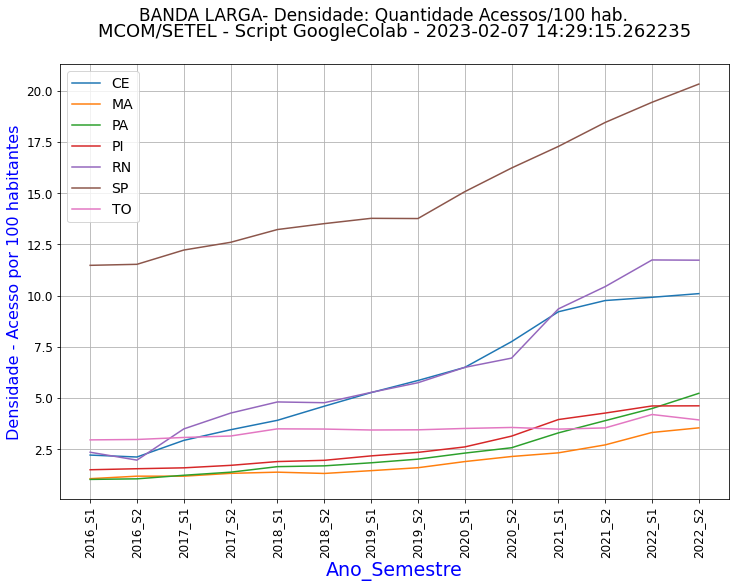

In [201]:
# Plot o gráfico de linha para cada município
# Group the data by year and municipality
matriz = grouped.groupby(FiltroGeo)
plt.figure(figsize=(12, 8))
# Plot a line chart for each group
for name, group in matriz:
    plt.plot(group['Ano_Semestre'], group['Densidade'], label=name)

plt.xlabel("Ano_Semestre", fontsize=19, color='blue')
plt.ylabel("Densidade - Acesso por 100 habitantes", fontsize=16, color='blue')
plt.legend(loc='best',fontsize=14)
plt.suptitle("BANDA LARGA- Densidade: Quantidade Acessos/100 hab.",fontsize=17)
plt.title("MCOM/SETEL - Script GoogleColab - "+timeStamp, y=1.05, fontsize=18)
plt.grid()

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.show()
